In [7]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib as mpl
from scipy import signal
from matplotlib import pyplot as plt
import D_XAS_Function_Definitions as D_XAS
import time


%reload_ext autoreload
%autoreload 2

In [2]:
path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy Spectrum 0_5Hz test data'
# path=r'\\ADLERNAS\admin\BrianGerwe\Research\Data\Dynamic XAS Data\Energy Spectrum_5Hz\Redo Txt Files'
# path=r'C:\Users\shadd\OneDrive\Documents\Python\fr_XAS\Dynamic XAS Energy Spectrum 0_5Hz test data\E90.txt'
# path=r'C:\Users\shadd\OneDrive\Documents\Python\fr_XAS\Dynamic XAS Energy Spectrum 5Hz test data'  #Dynamic XAS Energy Spectrum 0_5Hz test data'
initfile=1
finfile=2

fa=0.5
decfac=1000
ROhm=27.5

filea=np.r_[initfile:finfile+1]
sttime=time.perf_counter()

for n in filea:
    filestr=str(path+'/E'+str(n)+'.txt')
    print(filestr)
    stloop=time.perf_counter()
    
    all_files=glob.glob(filestr)
    data=pd.read_csv(filestr,delimiter='\t', header=None,engine='python')
    data.columns=('Time','Io','If','J','V') #Io is incident X-ray, If is fluroesced X-ray
    print('Data read time:'+ str(time.perf_counter()-stloop))
    if n==filea[0]:
        dum1=D_XAS.fullanalyze(data, fa,decfac,PhsCor="EtaPhs",plotFFT=False,IRR=100,Rohm=ROhm)
        print(time.perf_counter()-stloop)
#         dum1=partanalyze(data,0.5,2000)
    else:
        dum1=np.concatenate((dum1,D_XAS.fullanalyze(data,fa,decfac,PhsCor="EtaPhs",IRR=100,Rohm=ROhm)),axis=0)
        print(time.perf_counter()-stloop)
#         dum1=dum1=np.concatenate((dum1,partanalyze(data,0.5,2000)),axis=0)

    
path=os.getcwd()+r'\Energy List.txt'

Elist=pd.read_csv(path, header=None)
Elist=np.array(Elist[0])

Edum=np.tile(Elist,dum1.shape[2])
Edum.resize(dum1.shape[2],Elist.size)

dum2=dum1
dum2d=dum2.transpose(2,0,1).reshape(-1,dum2.shape[1])

print(dum2d.shape,time.perf_counter()-sttime)

C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy Spectrum 0_5Hz test data/E1.txt
Data read time:21.634352500000002
Z before Phs (39.740934533798466-8.274475377526537j)
Z after Phs (39.74093453379846-8.274475377526535j)
35.4878771
C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy Spectrum 0_5Hz test data/E2.txt
Data read time:21.531879500000002
Z before Phs (39.634627855795344-8.17557920456427j)
Z after Phs (39.63462785579533-8.175579204564276j)
43.981918
(200, 7) 79.6111341


In [10]:
np.savetxt('Dynamic XAS Energy analyzed data\ESweep0_5Hz_ReaddMean_EtaPhsCorrect_RawXray_Dec2000_Hold.txt', dum2d,fmt='%.8e')

In [181]:
np.savetxt('Energy List for 5 Hz.txt', Elistd,fmt='%.8e')

In [253]:
ones=np.tile(1,dum3[:,0,:,None].shape).transpose(0,2,1)
dum3=np.concatenate((dum3,ones),axis=1)

In [254]:
dumdir='Dynamic XAS Energy analyzed data\ESweep_5 Hz'
dumfhead='\Ir_5Hz_ReaddMean_EtaPhsCorrect_'
SavebyEta(np.real(dum3),Elist,1,177,dumdir,dumfhead,'.csv',EtaInd=-2)

Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_0_19_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_1_19_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_2_23_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_3_22_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_4_18_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_5_17_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_6_18_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_7_17_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_8_10_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_9_7_mV .csv
Dynamic XAS Energy analyzed data\ESweep_5 Hz\Ir_5Hz_ReaddMean_EtaPhsCorrect_10_7_mV .csv
Dynamic XAS Energy ana

C:\Users\shadd\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


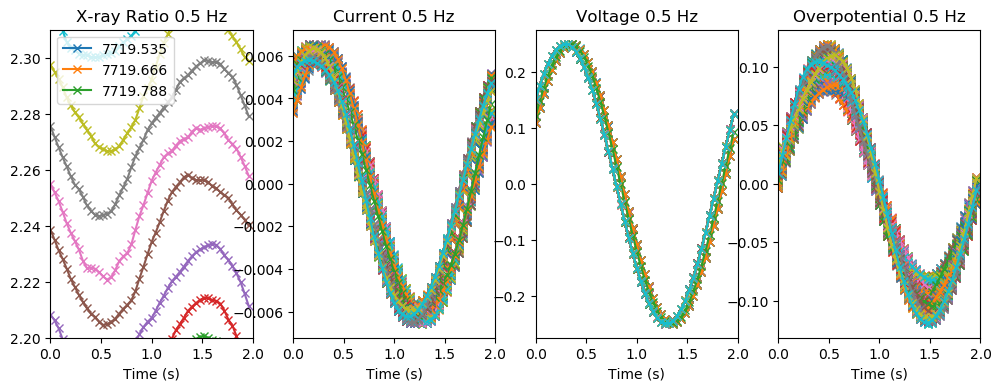

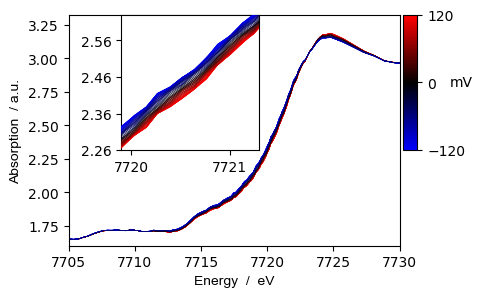

In [8]:
fhead=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy analyzed data'
path1=fhead+r'\ESweep0_5Hz_ReaddMean_EtaPhsCorrect_RawXray_Dec2000_Hold.txt'

dum1=D_XAS.readolddata(path1,2000,0.5,7)


Irmeans=np.array([np.mean(dum1[:,1,:],axis=1)]).T
dum1[:,1,:]=-1*(dum1[:,1,:]-Irmeans)
dum1[:,1,:]=dum1[:,1,:]+Irmeans

path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Energy List.txt'

Elist=pd.read_csv(path, header=None)
Elist=np.array(Elist[0])

Edum=np.tile(Elist,dum1.shape[2])
Edum.resize(dum1.shape[2],Elist.size)
Edum=Edum.transpose()


fig=plt.figure(figsize=(12,4))
mpl.style.use('default')
# sns.set_palette(default')

ax1=fig.add_subplot(141)
ax1.plot(dum1[:,0,:].T,dum1[:,1,:].T,'-x') 
ax1.set_xlim(0,2)
ax1.set_ylim(2.2,2.31)
ax1.set_title('X-ray Ratio 0.5 Hz')
ax1.set_xlabel('Time (s)')
ax1.legend(np.round(Edum[85:88,0],3),loc='upper left')
# ax1.set_ylabel('Absorbance (a.u.)')

ax1=fig.add_subplot(142)
ax1.plot(dum1[:,0,:].T,dum1[:,2,:].T,'-x') 
ax1.set_xlim(0,2)
ax1.set_title('Current 0.5 Hz')
ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Voltage (V)')

ax1=fig.add_subplot(143)
ax1.plot(dum1[:,0,:].T,dum1[:,3,:].T,'-x') 
ax1.set_xlim(0,2)
# ax1.set_ylim(-.0001,.0001)
ax1.set_title('Voltage 0.5 Hz')
ax1.set_xlabel('Time (s)')

ax1=fig.add_subplot(144)
ax1.plot(dum1[:,0,:].T,dum1[:,-1,:].T,'-x') 
ax1.set_xlim(0,2)
# ax1.set_ylim(-.0001,.0001)
ax1.set_title('Overpotential 0.5 Hz')
ax1.set_xlabel('Time (s)')
# ax1.legend(dum1[:,3,0],loc='upper left')
# ax1.set_ylabel('Voltage (V)')

plt.show()
# plt.savefig('0_5 Hz Time Domain Plots Voltage Phs.png')

plt0=D_XAS.plotXANES(Edum,np.real(dum1),startE=7705,stopE=7730,startInE=7720,stopInE=7721.5,
               start=2,stop=2,in_adjs=[0,-.6,1,.05,-.18,.1,-.1,0],size=(4.5,3),UseEta=True,marker='')
# plt0.savefig('0_5 Hz X-ray Spectra Eta Phs.png',bbox_inches='tight',dpi=500)
# plt.savefig('0_5 Hz X-ray Spectra Voltage Phs.png',format='png')

# print(int(round(np.max(dum1[:,-1,:])*1000,0)),int(round(np.min(dum1[:,-1,:])*1000,0)))

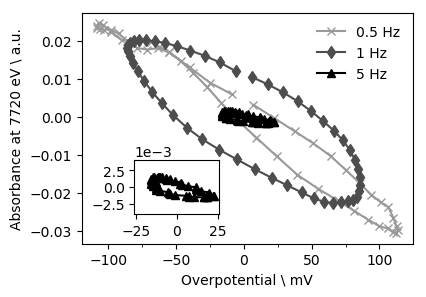

In [10]:
fhead=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy analyzed data'
path1=fhead+r'\ESweep0_5Hz_ReaddMean_EtaPhsCorrect_RawXray_Dec2000_Hold.txt'
path2=fhead+r'\ESweep1Hz_ReaddMean_EtaPhsCorrect_RawXray_Dec1000_Hold.txt'
path3=fhead+'\ESweep5Hz_ReaddMean_EtaPhsCorrect_RawXray_Dec200_Hold.txt'

dum1=D_XAS.readolddata(path1,2000,0.5,7)
Irmeans=np.array([np.mean(dum1[:,1,:],axis=1)]).T
dum1[:,1,:]=-1*(dum1[:,1,:]-Irmeans)
dum1[:,1,:]=dum1[:,1,:]+Irmeans

dum2=D_XAS.readolddata(path2,1000,1,7)
Irmeans=np.array([np.mean(dum2[:,1,:],axis=1)]).T
dum2[:,1,:]=-1*(dum2[:,1,:]-Irmeans)
dum2[:,1,:]=dum2[:,1,:]+Irmeans

dum3=D_XAS.readolddata(path3,200,5,7)
# Irmeans=np.array([np.mean(dum3[:,1,:],axis=1)]).T
# dum3[:,1,:]=-1*(dum3[:,1,:]-Irmeans)
# dum3[:,1,:]=dum3[:,1,:]+Irmeans


# dum1=CalcEta(dum1)
# dum2=CalcEta(dum2)
dum3=D_XAS.CalcEta(dum3,Rohm=56)

Abs1=dum1[92,1,:].T-np.mean(dum1[92,1,:])
Abs2=dum2[92,1,:].T-np.mean(dum2[92,1,:])
Abs3=dum3[92,1,:].T-np.mean(dum3[92,1,:])

Eta1=1000*dum1[92,-1,:].T
Eta2=1000*dum2[92,-1,:].T
Eta3=1000*dum3[92,-1,:].T
size=(4.5,3)

fig=plt.figure(constrained_layout=False,figsize=size)
gs=fig.add_gridspec(8,20)
f_ax1=fig.add_subplot(gs[:,:-1])

f_ax1.plot(Eta1,Abs1,'-x',color='0.6',zorder=2,label='0.5 Hz')
f_ax1.plot(Eta2,Abs2,'-d',color='0.3',zorder=3,label='1 Hz')
f_ax1.plot(Eta3,Abs3,'-^',color='0',zorder=4,label='5 Hz')

f_ax1.set(xlabel='Overpotential \ mV', ylabel=r'Absorbance at 7720 eV \ a.u.')
          #xticks=np.arange(-100,101,50))
ax1minLoc=mpl.ticker.MultipleLocator(25)
f_ax1.xaxis.set_minor_locator(ax1minLoc)
f_ax1.legend(frameon=False,shadow=False)

f_ax2=fig.add_subplot(gs[5:7,3:8])
f_ax2.plot(Eta3,Abs3,'-^',color='0',zorder=4,label='5 Hz')
f_ax2.set(xlim=(-26,26),ylim=(-.004,.004))
f_ax2.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

# fig.savefig('7720 eV Abs vs Eta Eta Phase.png',bbox_inches='tight',dpi=500)

In [70]:
dum2=np.delete(dum2,74,axis=0)

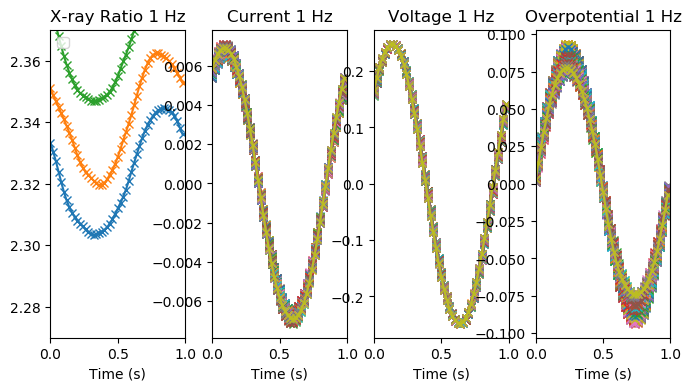

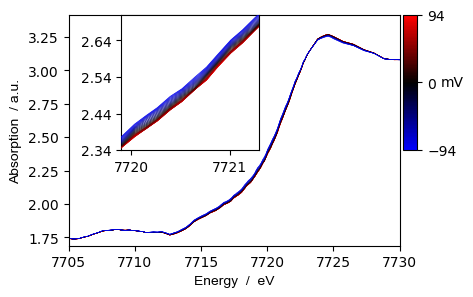

In [12]:
fhead=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy analyzed data'
path2=fhead+r'\ESweep1Hz_ReaddMean_EtaPhsCorrect_RawXray_Dec1000_Hold.txt'

dum2=D_XAS.readolddata(path2,1000,1,NumCh=7)

path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Energy List.txt'

Elist=pd.read_csv(path, header=None)
Elist=np.array(Elist[0])

## Removing weird values ~7718.2 eV from data set
dum2=np.delete(dum2,74,axis=0)
Elist=np.delete(Elist,74,axis=0)

Irmeans=np.array([np.mean(dum2[:,1,:],axis=1)]).T
dum2[:,1,:]=-1*(dum2[:,1,:]-Irmeans)
dum2[:,1,:]=dum2[:,1,:]+Irmeans

Edum=np.tile(Elist,dum2.shape[2])
Edum.resize(dum2.shape[2],Elist.size)
Edum=Edum.transpose()

fig=plt.figure(figsize=(8,4))

ax1=fig.add_subplot(141)
ax1.plot(dum2[85:88,0,:].T,dum2[85:88,1,:].T,'-x') 
ax1.set_xlim(0,1)
ax1.set_ylim(2.27,2.37)
ax1.set_title('X-ray Ratio 1 Hz')
ax1.set_xlabel('Time (s)')
ax1.legend(np.round(Edum[0,85:88],3),loc='upper left')
# ax1.set_ylabel('Absorbance (a.u.)')

ax1=fig.add_subplot(142)
ax1.plot(dum2[:,0,:].T,dum2[:,2,:].T,'-x') 
ax1.set_xlim(0,1)
ax1.set_title('Current 1 Hz')
ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Voltage (V)')

ax1=fig.add_subplot(143)
ax1.plot(dum2[:,0,:].T,dum2[:,3,:].T,'-x') 
ax1.set_xlim(0,1)
# ax1.set_ylim(-.0001,.0001)
ax1.set_title('Voltage 1 Hz')
ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Voltage (V)')

ax1=fig.add_subplot(144)
ax1.plot(dum2[:,0,:].T,dum2[:,-1,:].T,'-x') 
ax1.set_xlim(0,1)
# ax1.set_ylim(-.0001,.0001)
ax1.set_title('Overpotential 1 Hz')
ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Voltage (V)')

# plt.show()
# plt.savefig('1 Hz Time Domain Plots.png')
plt1=D_XAS.plotXANES(Edum,np.real(dum2),startE=7705,stopE=7730,startInE=7720,stopInE=7721.5,
               start=12,stop=15,in_adjs=[0,-.6,1,.05,-.18,.1,-.1,0],size=(4.5,3),UseEta=True,marker='')
# plt1.savefig('1 Hz X-ray Spectra Eta Phs.png',dpi=500, bbox_inches='tight')


In [73]:
path=r'C:\Users\shadd\OneDrive\Documents\Python\fr_XAS\Energy List.txt'

Elist5=pd.read_csv(path, header=None)
Elist5=np.array(Elist5[0])
Elist5=np.delete(Elist5,6)
Elist5=np.delete(Elist5,0)

In [125]:
dum3=dum1.copy()

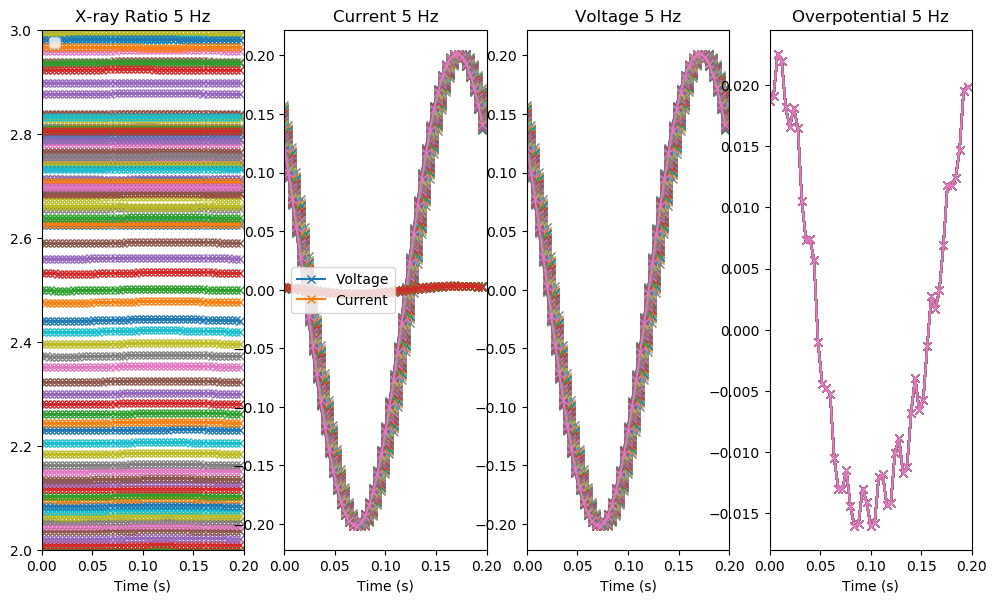

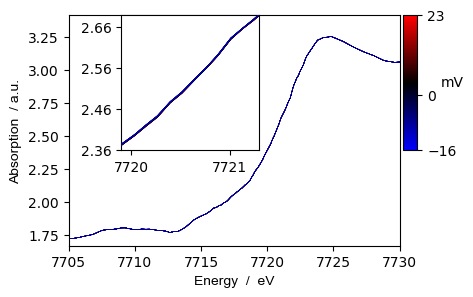

In [15]:
fhead=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy analyzed data'
path3=fhead+'\ESweep5Hz_ReaddMean_EtaPhsCorrect_RawXray_Dec200_Hold.txt'

dum3=D_XAS.readolddata(path3,200,5,7)

# dum3[:,3,:]=dum3[:,3,:]*-1
# Irmeans=np.array([np.mean(dum3[:,1,:],axis=1)]).T
# dum3[:,1,:]=-1*(dum3[:,1,:]-Irmeans)
# dum3[:,1,:]=dum3[:,1,:]+Irmeans

path=os.getcwd()+r'\Energy List.txt'

Elist5=pd.read_csv(path, header=None)
Elist5=np.array(Elist5[0])
Elist5=np.delete(Elist5,158)
Elist5=np.delete(Elist5,106)
Elist5=np.delete(Elist5,6)

dum3=np.delete(dum3,6,axis=0)

dum3=D_XAS.CalcEta(dum3,Rohm=56)

Edum5=np.tile(Elist5,dum3.shape[2])
Edum5.resize(dum3.shape[2],Elist5.size)
Edum5=Edum5.transpose()

fig=plt.figure(figsize=(12,6.75))

ax1=fig.add_subplot(141)
ax1.plot(dum3[:,0,:].T,dum3[:,1,:].T,'-x') 
ax1.set_xlim(0,.2)
ax1.set_ylim(2.,3)
ax1.set_title('X-ray Ratio 5 Hz')
ax1.set_xlabel('Time (s)')
ax1.legend(Edum5[0,85:88],loc='upper left')
# ax1.set_ylabel('Absorbance (a.u.)')

ax1=fig.add_subplot(142)
ax1.plot(dum3[:,0,:].T,dum3[:,3,:].T,'-x',dum3[:,0,:].T,dum3[:,2,:].T,'-x') 
ax1.set_xlim(0,.2)
ax1.set_title('Current 5 Hz')
ax1.set_xlabel('Time (s)')
ax1.legend(['Voltage','Current'],loc=6)
# ax1.set_ylabel('Voltage (V)')

ax1=fig.add_subplot(143)
ax1.plot(dum3[:,0,:].T,dum3[:,3,:].T,'-x') 
ax1.set_xlim(0,.2)
# ax1.set_ylim(-.0001,.0001)
ax1.set_title('Voltage 5 Hz')
ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Voltage (V)')

ax1=fig.add_subplot(144)
ax1.plot(dum3[:,0,:].T,dum3[:,-1,:].T,'-x') 
ax1.set_xlim(0,.2)
# ax1.set_ylim(-.0001,.0001)
ax1.set_title('Overpotential 5 Hz')
ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Voltage (V)')

# plt.show()
# plt.savefig('5 Hz Time Domain Plots.png')

plt2=D_XAS.plotXANES(Edum5,np.real(dum3),startE=7705,stopE=7730,startInE=7720,stopInE=7721.5,
               start=5,stop=20,in_adjs=[0,-.6,1,.08,-.18,.1,-.1,0],size=(4.5,3),UseEta=True,marker='')
# plt2.tight_layout()
# plt2.savefig('5 Hz X-ray Spectra Eta Phs.png',dpi=500, bbox_inches='tight')

ValueError: x and y must have same first dimension, but have shapes (50, 15) and (180, 5)

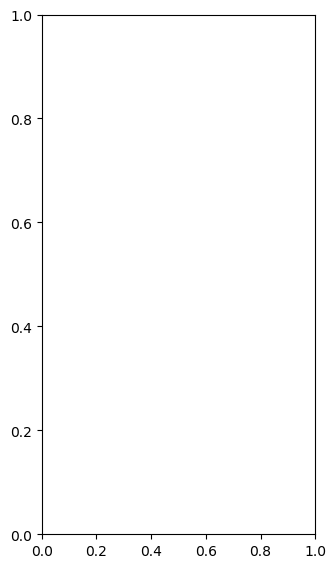

In [16]:
fig=plt.figure(figsize=(12,6.75))

ax1=fig.add_subplot(131)
ax1.plot(Edum[::12,:].T,dum1[:,1,::12],'-x') 
ax1.set_xlim(7716,7724)
ax1.set_ylim(1.75,3.3)
ax1.set_title('X-ray Absorption Spectrum 0.5 Hz')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Absorbance (a.u.)')

ax1=fig.add_subplot(132)
ax1.plot(Edum[::12,:].T,dum2[:,1,::12],'-x') 
ax1.set_xlim(7716,7724)
ax1.set_ylim(1.75,3.3)
ax1.set_title('X-ray Absorption Spectrum 1 Hz')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Absorbance (a.u.)')

ax1=fig.add_subplot(133)
ax1.plot(Edum5[::12,:].T,dum3[:,1,::12],'-x') 
ax1.set_xlim(7716,7724)
ax1.set_ylim(1.75,3.3)
ax1.set_title('X-ray Absorption Spectrum 5 Hz')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Absorbance (a.u.)')


# plt.savefig('X-ray edge comparison.png')

In [17]:
path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy analyzed data\ESweep0_5Hz_NoPhsCorrectNoSub.txt'

dum1=D_XAS.readolddata(path,2000,0.5)


path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Energy List.txt'

Elist=pd.read_csv(path, header=None)
Elist=np.array(Elist[0])

Edum=np.tile(Elist,dum1.shape[2])
Edum.resize(dum1.shape[2],Elist.size)

mpl.rcParams['savefig.pad_inches']=0

fig=plt.figure(figsize=(12,6.75))


ax1=fig.add_subplot(131)
ax1.plot(Edum[:,:].T,dum1[:,1,:],'-') 
ax1.set_xlim(7715,7725)
ax1.set_title('X-ray Spectrum')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Absorbance (a.u.)')

ax1=fig.add_subplot(132)
ax1.plot(dum1[:,0,:].T,dum1[:,1,:].T,'-')
ax1.set_title('X-Ray Time Domain')
ax1.set_xlabel('Time (s)')

ax1=fig.add_subplot(133)
ax1.plot(dum1[:,0,:].T,dum1[:,3,:].T,'-')
ax1.set_title('Voltage Time Domain')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)')


# plt.show()

# plt.savefig('0_5 Hz No Phs Correct No Sub Mean.png') 

ZeroDivisionError: division by zero

C:\Users\shadd\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Voltage (V)')

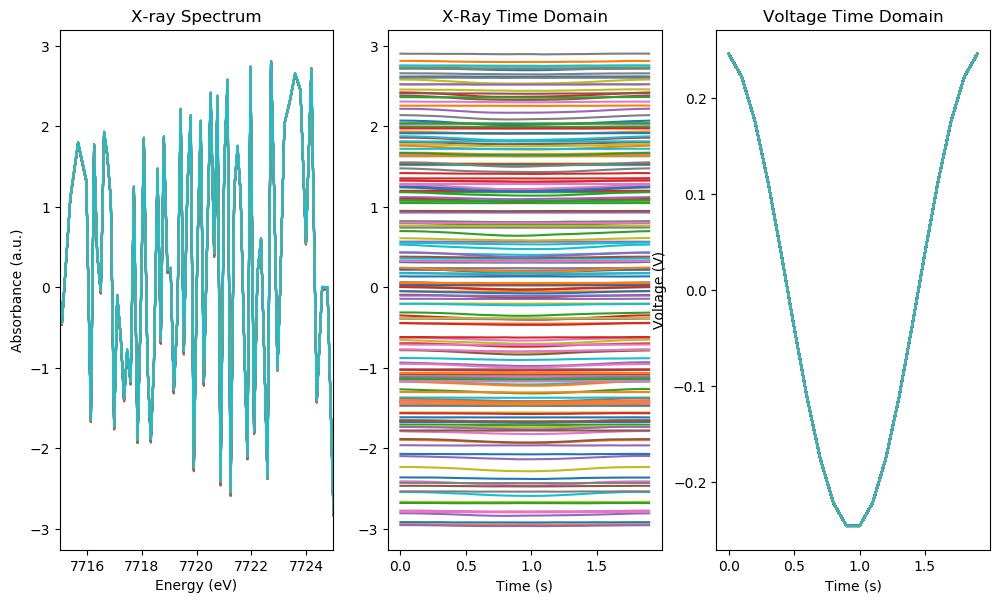

In [18]:
path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy analyzed data\ESweep0_5Hz_NoSub.txt'

dum1=D_XAS.readolddata(path,5000,0.5)


path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Energy List.txt'

Elist=pd.read_csv(path, header=None)
Elist=np.array(Elist[0])

Edum=np.tile(Elist,dum1.shape[2])
Edum.resize(dum1.shape[2],Elist.size)

fig=plt.figure(figsize=(12,6.75))

ax1=fig.add_subplot(131)
ax1.plot(Edum[:,:].T,dum1[:,1,:],'-') 
ax1.set_xlim(7715,7725)
ax1.set_title('X-ray Spectrum')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Absorbance (a.u.)')

ax1=fig.add_subplot(132)
ax1.plot(dum1[:,0,:].T,dum1[:,1,:].T,'-')
ax1.set_title('X-Ray Time Domain')
ax1.set_xlabel('Time (s)')

ax1=fig.add_subplot(133)
ax1.plot(dum1[:,0,:].T,dum1[:,3,:].T,'-')
ax1.set_title('Voltage Time Domain')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)')

# plt.show()

# plt.savefig('0_5 Hz Phs Correct No Sub Mean.png') 

Text(0, 0.5, 'Voltage (V)')

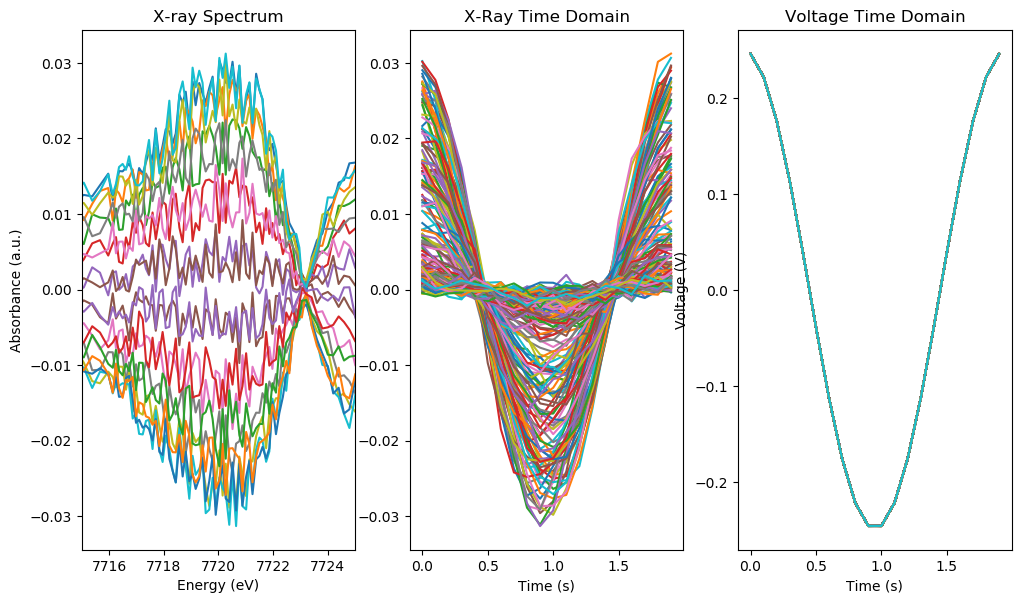

In [19]:
path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy analyzed data\ESweep0_5Hz_Subtracted Means.txt'

dum1=D_XAS.readolddata(path,5000,0.5)


path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Energy List.txt'

Elist=pd.read_csv(path, header=None)
Elist=np.array(Elist[0])

Edum=np.tile(Elist,dum1.shape[2])
Edum.resize(dum1.shape[2],Elist.size)

fig=plt.figure(figsize=(12,6.75))


ax1=fig.add_subplot(131)
ax1.plot(Edum[:,:].T,dum1[:,1,:],'-') 
ax1.set_xlim(7715,7725)
ax1.set_title('X-ray Spectrum')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Absorbance (a.u.)')

ax1=fig.add_subplot(132)
ax1.plot(dum1[:,0,:].T,dum1[:,1,:].T,'-')
ax1.set_title('X-Ray Time Domain')
ax1.set_xlabel('Time (s)')

ax1=fig.add_subplot(133)
ax1.plot(dum1[:,0,:].T,dum1[:,3,:].T,'-')
ax1.set_title('Voltage Time Domain')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)')

# plt.show()

# plt.savefig('0_5 Hz Phs Correct Sub Mean.png') 

Text(0, 0.5, 'Voltage (V)')

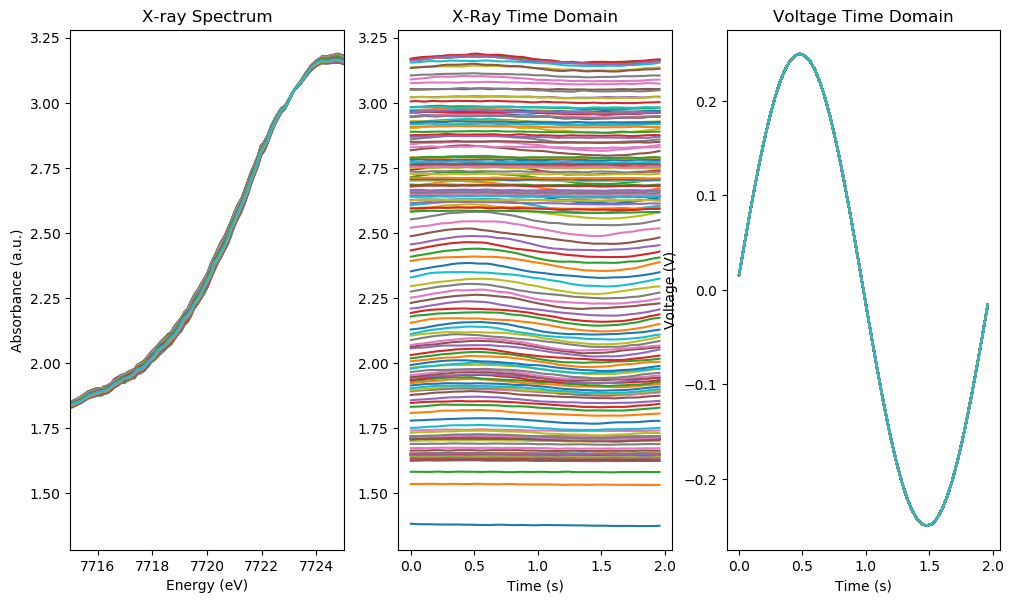

In [20]:
path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy analyzed data\ESweep0_5Hz_ReaddMean_PhsCorrect_Dec2000.txt'

dum1=D_XAS.readolddata(path,2000,0.5)


path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Energy List.txt'

Elist=pd.read_csv(path, header=None)
Elist=np.array(Elist[0])

Edum=np.tile(Elist,dum1.shape[2])
Edum.resize(dum1.shape[2],Elist.size)

fig=plt.figure(figsize=(12,6.75))


ax1=fig.add_subplot(131)
ax1.plot(Edum[:,:].T,dum1[:,1,:],'-') 
ax1.set_xlim(7715,7725)
ax1.set_title('X-ray Spectrum')
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Absorbance (a.u.)')

ax1=fig.add_subplot(132)
ax1.plot(dum1[:,0,:].T,dum1[:,1,:].T,'-')
ax1.set_title('X-Ray Time Domain')
ax1.set_xlabel('Time (s)')

ax1=fig.add_subplot(133)
ax1.plot(dum1[:,0,:].T,dum1[:,3,:].T,'-')
ax1.set_title('Voltage Time Domain')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)')

# plt.show()

# plt.savefig('0_5 Hz Phs Correct Readd Mean.png') 

In [43]:
del data, dum2d, dum3d, dum1

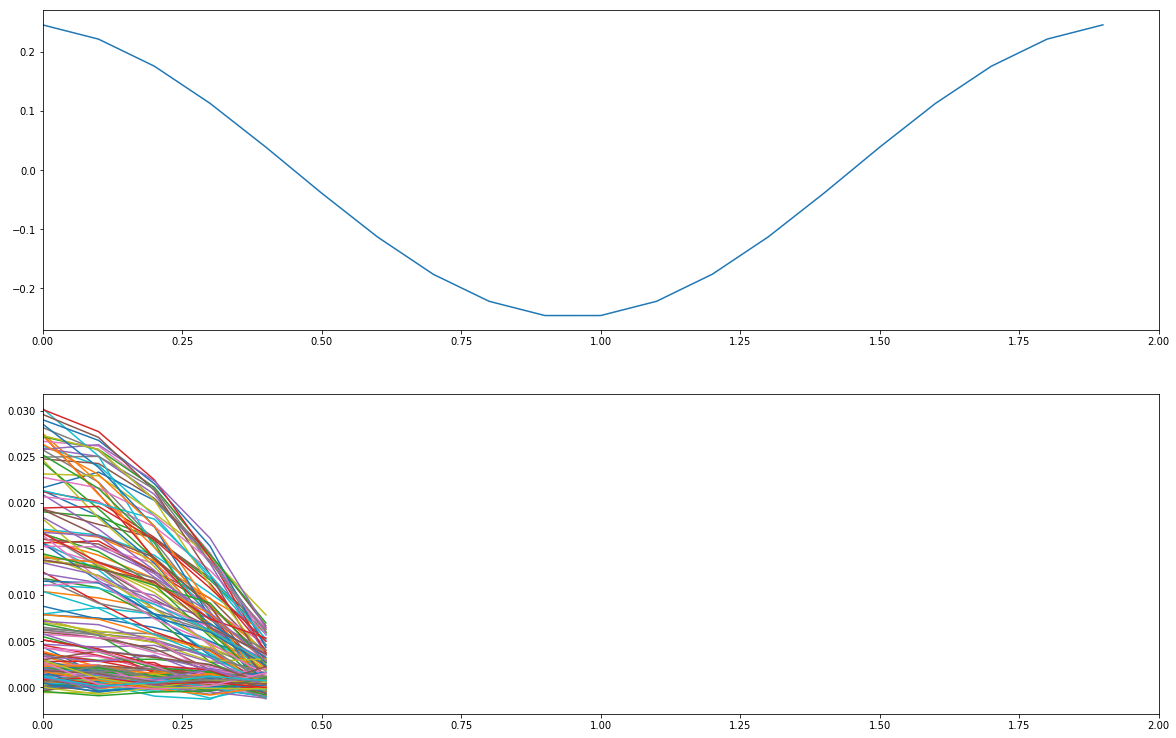

In [38]:
fig=plt.figure(figsize=(20,20))

ax1=fig.add_subplot(311)
ax1.plot(np.real(dum1[0,0,:]),dum1[85,3,:])
ax1.set_xlim(0,2)

ax1=fig.add_subplot(312)
ax1.plot(np.real(dum1[:,0,0:5].T),dum1[:,1,0:5].T)
ax1.set_xlim(0,2)

plt.show()

In [110]:
#Reads data without doing any phase corrections or signal averaging/decimating

path=r'C:\Users\shadd\OneDrive\Documents\Python\Dynamic XAS\Dynamic XAS Energy Spectrum 0_5Hz test data'
initfile=80
finfile=80
filea=np.r_[initfile:finfile+1]
for n in filea:
    filestr=str(path+'/E'+str(n)+'.txt')
    print(filestr)
    all_files=glob.glob(filestr)
    data=pd.read_csv(filestr,delimiter='\t', header=None,engine='python')
    data.columns=('Time','Io','If','J','V') #Io is incident X-ray, If is fluroesced X-ray
    if n==filea[0]:
        print('first')
#         dum1=fullanalyze(data, 0.5,2000)
        dum1=np.array(data,ndmin=3)
    else:
        print(n)    
#         dum1=np.concatenate((dum1,fullanalyze(data,0.5,2000)),axis=0)
        dum1=dum1=np.concatenate((dum1,np.array(data,ndmin=3)),axis=0).transpose(0,2,1)

C:\Users\shadd\OneDrive\Documents\Python\fr_XAS\Dynamic XAS Energy Spectrum 0_5Hz test data/E80.txt
first


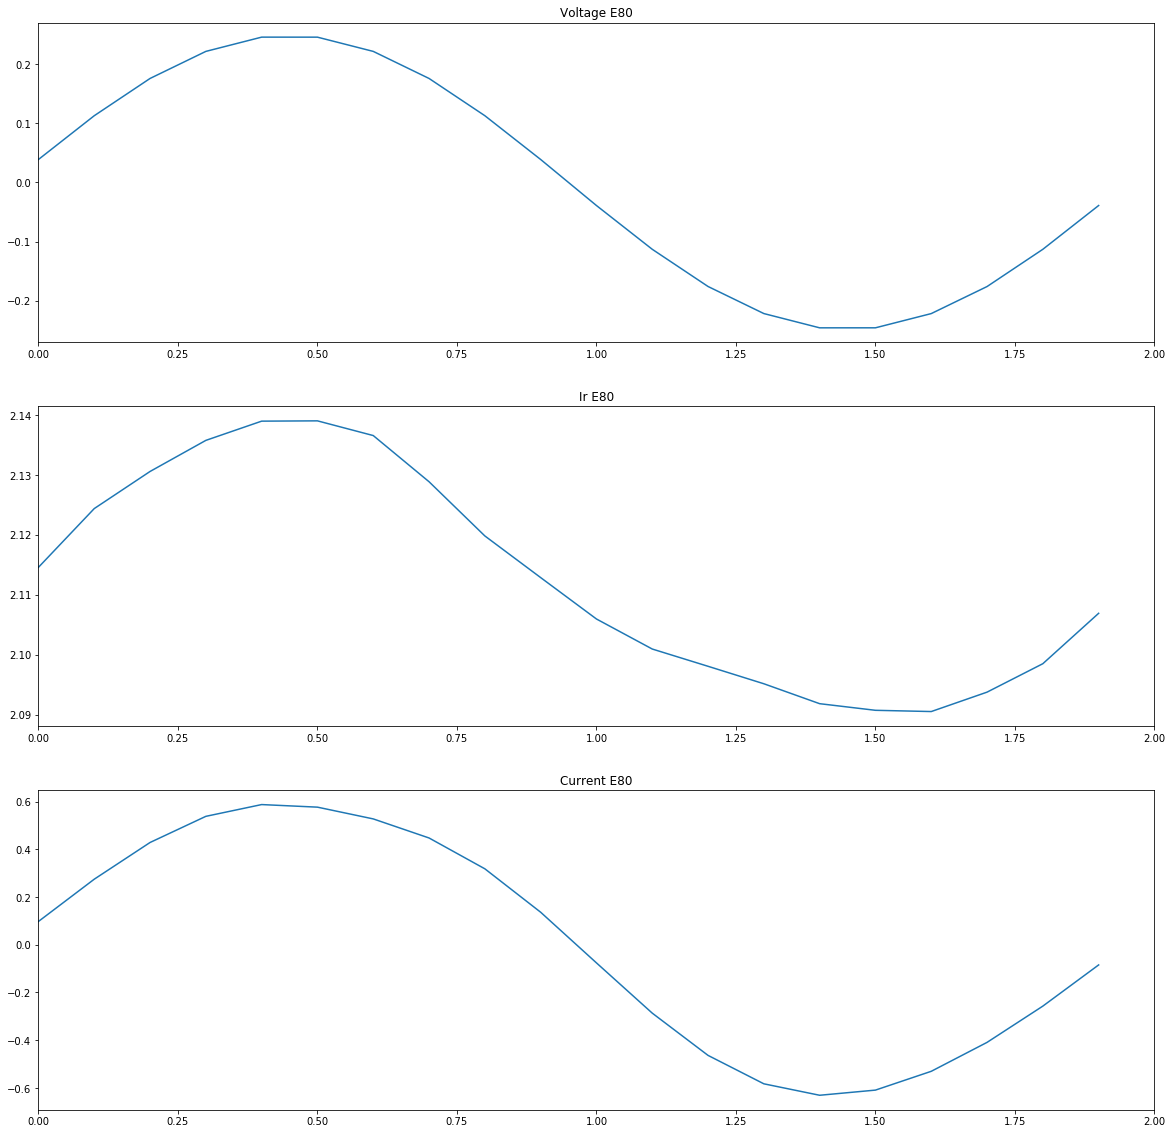

In [112]:
fig=plt.figure(figsize=(20,20))

ax1=fig.add_subplot(311)
ax1.plot(datav[0,0,:],datav[0,3,:])
ax1.set_title(str('Voltage E'+str(initfile)))
ax1.set_xlim(0,2)

ax1=fig.add_subplot(312)
ax1.plot(datav[0,0,:],datav[0,1,:])
ax1.set_title(str('Ir E'+str(initfile)))
ax1.set_xlim(0,2)

ax1=fig.add_subplot(313)
ax1.plot(datav[0,0,:],datav[0,2,:])
ax1.set_title(str('Current E'+str(initfile)))
ax1.set_xlim(0,2)

plt.show()

In [114]:
fig.savefig('Dynamic XAS Energy Plots\E'+ str(initfile)+'plots Readd Mean With Phs Corr.png')

# Old code below. Probably still works-- mostly process of figuring out the fullanalyze function

In [3]:
#path=r'G:/My Drive/UW Research/Dynamic XAS Data/Energy Spectrum_0.5Hz/Txt Files/E85.txt'
path=r'C:\Users\shadd\OneDrive\Documents\Python\fr_XAS\Dynamic XAS Energy Spectrum 0_5Hz test data\E85.txt'
all_files=glob.glob(path)
data=pd.read_csv(path,delimiter='\t', header=None)
data.columns=('Time','Io','If','J','V') #Io is incident X-ray, If is fluroesced X-ray

Ir=np.array(data['If']/data['Io'])
datan=np.array([data['Time'],submean(Ir),submean(data['J']),submean(data['V'])])

Ns=datan[0,:].size
dt=datan[0,1]

In [4]:
datafft, freq=getfft(datan[1:,:],datan[0,:])

In [5]:
fftang=np.angle(datafft)
fftmag=np.abs(datafft)
bin1=datain.fftbin(0.5,freq,Ns,dt,"Real",1)
angadj=fftang[0,int(bin1[1])]+np.pi/2
angadj2=fftang[1,int(bin1[1])]+np.pi/2
angadj3=fftang[2,int(bin1[1])]+np.pi/2

fftang2=fftang

fftang2[0,int(Ns/2):]=fftang[0,int(Ns/2):]-angadj #adjusting positive frequencies
fftang2[0,:int(Ns/2)]=fftang[0,:int(Ns/2)]+angadj #adjusting negative frequencies

fftang2[1,int(Ns/2):]=fftang[1,int(Ns/2):]-angadj2 #adjusting positive frequencies
fftang2[1,:int(Ns/2)]=fftang[1,:int(Ns/2)]+angadj2 #adjusting negative frequencies

fftang2[2,int(Ns/2):]=fftang[2,int(Ns/2):]-angadj3 #adjusting positive frequencies
fftang2[2,:int(Ns/2)]=fftang[2,:int(Ns/2)]+angadj3 #adjusting negative frequencies

datafft2=datain.P2R(fftmag,fftang2)

In [6]:
print(np.shape(fftang))
print(np.angle(datafft[2,int(bin1[0])+1]),np.angle(datafft[2,int(bin1[1])]))
print(freq[int(bin1[1]):int(bin1[1])+3])
print(freq[int(bin1[0])-1:int(bin1[0])+3])
print(angadj,np.angle(datafft2[1,int(bin1[0])]))
print(fftang[2,int(bin1[1])+4],fftang2[2,int(bin1[1])+4])

(3, 3000000)
-0.9424556956177024 0.9424556956177024
[0.5        0.51666667 0.53333333]
[-0.53333333 -0.51666667 -0.5        -0.48333333]
2.513252022412599 -1.714993984058784
-1.629210258963357 -1.629210258963357


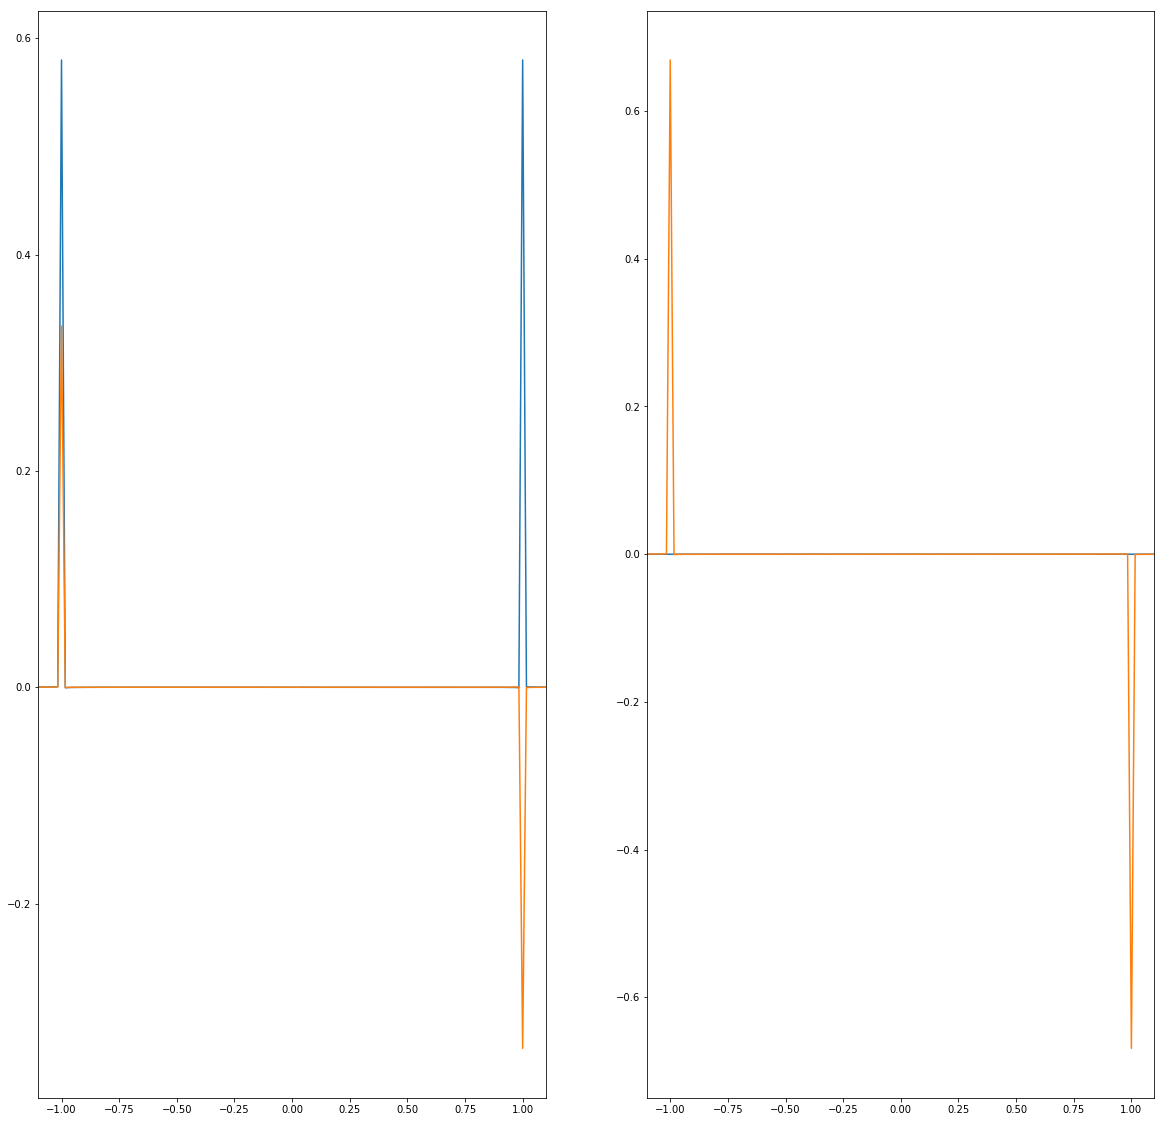

In [18]:
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(121)

ax1.plot(freq,np.real(datafft[2,:]),freq,np.imag(datafft[2,:]))
ax1.set_xlim(-1.1,1.1)

ax1=fig.add_subplot(122)

ax1.plot(freq,np.real(datafft2[2,:]),freq,np.imag(datafft2[2,:]))
ax1.set_xlim(-1.1,1.1)
# ax1.set_ylim(0,.001)
plt.show()

In [6]:
dataffti=np.fft.ifft(np.fft.ifftshift(datafft2)*Ns/2)

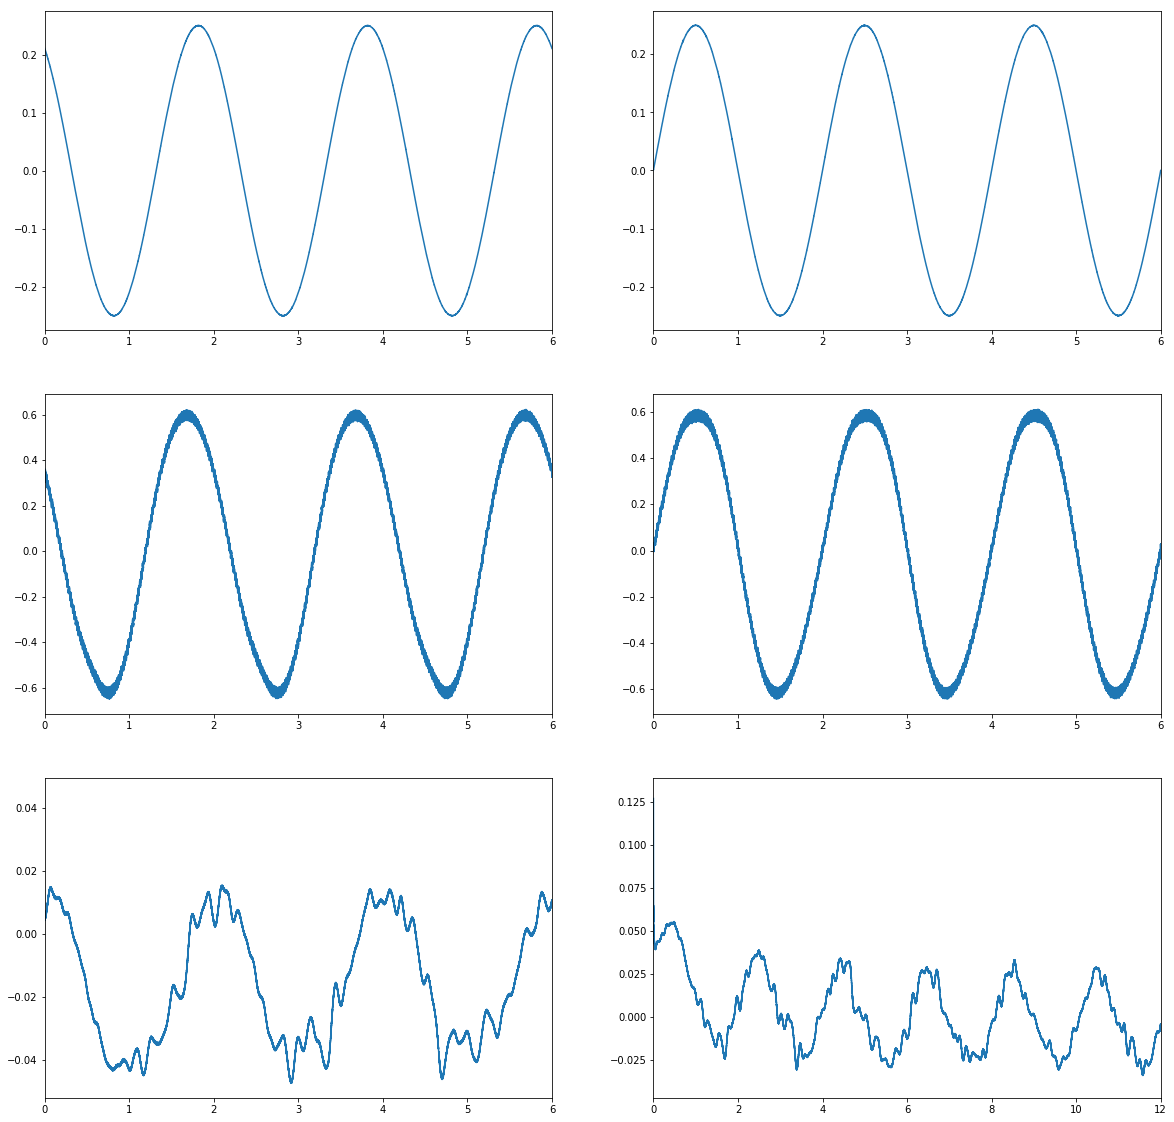

In [8]:
fig=plt.figure(figsize=(20,20))

ax1=fig.add_subplot(321)
ax1.plot(datan[0,:],datan[3,:])
ax1.set_xlim(0,6)

ax1=fig.add_subplot(322)
ax1.plot(datan[0,:],dataffti[2,:])
ax1.set_xlim(0,6)

ax1=fig.add_subplot(323)
ax1.plot(datan[0,:],datan[2,:])
ax1.set_xlim(0,6)

ax1=fig.add_subplot(324)
ax1.plot(datan[0,:],dataffti[1,:])
ax1.set_xlim(0,6)

ax1=fig.add_subplot(325)
ax1.plot(datan[0,:],datan[1,:])
ax1.set_xlim(0,6)

ax1=fig.add_subplot(326)
ax1.plot(datan[0,:],dataffti[0,:])
ax1.set_xlim(0,6)

plt.show()

In [10]:
t=datan[0,:]
Ir=dataffti[0,:]
V=dataffti[1,:]
J=dataffti[2,:]

In [13]:
fa=0.5
dec=2000
fs=50000

Irdec,tdec=decimate(Ir,tarr=t,decfac=dec)
Iav,tav=sigavg(Irdec, freq=fa,tarr=tdec,sampf=fs/dec,decfac=dec)
Vav=sigavg(decimate(V,decfac=dec),freq=fa,sampf=fs/dec,decfac=dec)
Jav=sigavg(decimate(J,decfac=dec),freq=fa,sampf=fs/dec,decfac=dec)

Iav=Iav-np.mean(Iav)
Vav=Vav-np.mean(Vav)
Jav=Jav-np.mean(Jav)

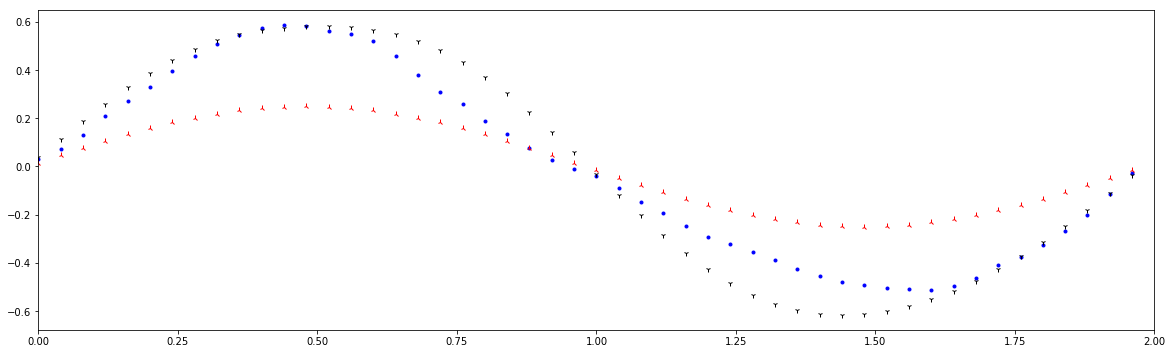

In [14]:
fig=plt.figure(figsize=(20,20))

# ax1=fig.add_subplot(311)
# ax1.plot(tdec,Idec1,'b.',tdec,Idec2,'k1',tdec,Idec3,'r2', tav,Iav,'g3')
# ax1.set_xlim(0,4)

# ax1=fig.add_subplot(312)
# ax1.plot(tdec,Idiff1,'b.',tdec,Idiff2,'k1',tdec,Idiff3,'r2')
# ax1.set_xlim(0,4)

ax1=fig.add_subplot(313)
ax1.plot(tav,(Iav)*20,'b.',tav,Vav,'k1',tav,Jav,'r2')
ax1.set_xlim(0,2)

plt.show()

In [8]:
decfac=500
Idec1,tdec=decimate(Ir,t,500)
Idec2=signal.resample(Ir,int(len(Ir)/decfac))
Idec3=signal.decimate(signal.decimate(signal.decimate(Ir,10),10),5)

Idiff1=np.sqrt((Idec2-Idec1)**2)
Idiff2=np.sqrt((Idec3-Idec1)**2)
Idiff3=np.sqrt((Idec3-Idec2)**2)
print(Idec1.shape,Idec2.shape,Idec3.shape,tdec.shape)
print(Idiff1.shape,Idiff2.shape,Idiff3.shape)

(6000,) (6000,) (6000,) (6000,)
(6000,) (6000,) (6000,)


In [ ]:
np.save